In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [16]:
file_path = 'sales_data_sample.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [19]:
print(df.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [20]:
mean_sales = df['SALES'].mean()
median_sales = df['SALES'].median()
mode_sales = df['SALES'].mode()[0]

print(f"Mean: {mean_sales}, Median: {median_sales}, Mode: {mode_sales}")

Mean: 3553.889071909316, Median: 3184.8, Mode: 3003.0


In [22]:
# Menghitung range
range_sales = df['SALES'].max() - df['SALES'].min()

# Menghitung kuartil
q1_sales = df['SALES'].quantile(0.25)
q3_sales = df['SALES'].quantile(0.75)

# Menghitung standar deviasi
std_sales = df['SALES'].std()

print(f"Range: {range_sales}, Q1: {q1_sales}, Q3: {q3_sales}, Std Dev: {std_sales}")

Range: 13600.67, Q1: 2203.4300000000003, Q3: 4508.0, Std Dev: 1841.865105740182


In [23]:
# Menghitung IQR
IQR = q3_sales - q1_sales

# Menentukan batas untuk outliers
lower_bound = q1_sales - 1.5 * IQR
upper_bound = q3_sales + 1.5 * IQR

# Mendapatkan outliers
outliers = df[(df['SALES'] < lower_bound) | (df['SALES'] > upper_bound)]
print(outliers)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
30          10150               45      100.0                8  10993.50   
32          10174               34      100.0                4   8014.82   
35          10206               47      100.0                6   9064.89   
41          10280               34      100.0                2   8014.82   
43          10304               47      100.0                6  10172.70   
...           ...              ...        ...              ...       ...   
2241        10325               38      100.0                3   8844.12   
2295        10324               48      100.0                4   8209.44   
2430        10395               45      100.0                3   8977.05   
2505        10388               46      100.0                2  10066.60   
2634        10336               46      100.0                2   9558.80   

            ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
30     9/19/2003 0:00

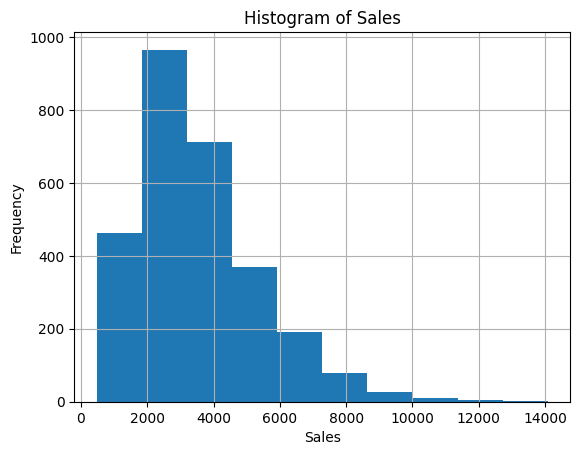

In [24]:
# Membuat histogram untuk kolom SALES
df['SALES'].hist(bins=10)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

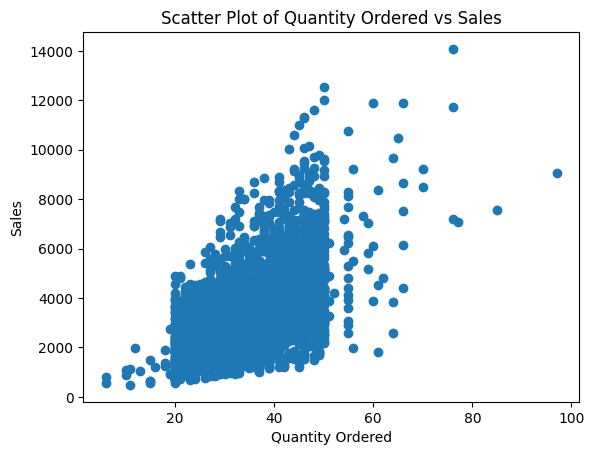

In [25]:
plt.scatter(df['QUANTITYORDERED'], df['SALES'])
plt.title('Scatter Plot of Quantity Ordered vs Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()


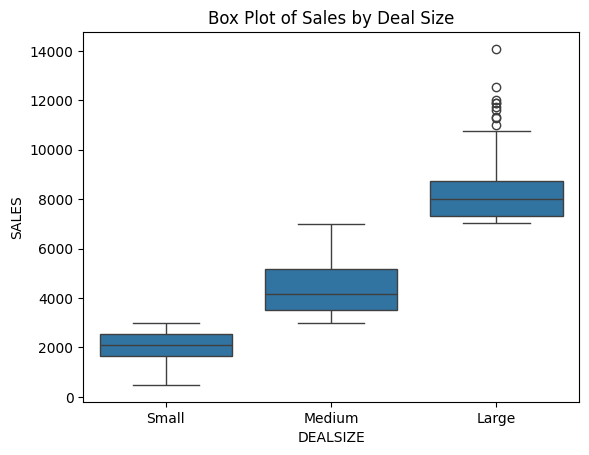

In [26]:
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Box Plot of Sales by Deal Size')
plt.show()